<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/data - data.csv")

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.groupby(["yr_built"])["yr_built"].count()

yr_built
1900    22
1901     9
1902    10
1903    10
1904     9
        ..
2010    28
2011    24
2012    33
2013    57
2014    78
Name: yr_built, Length: 115, dtype: int64

In [8]:
numerical=df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]

In [9]:
categorical=df[['street','city','statezip','country']]

In [12]:
df.shape

(4600, 18)

In [11]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

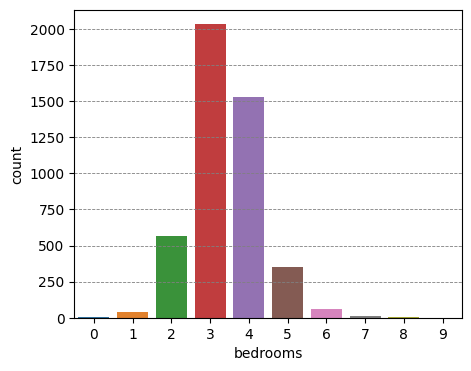

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

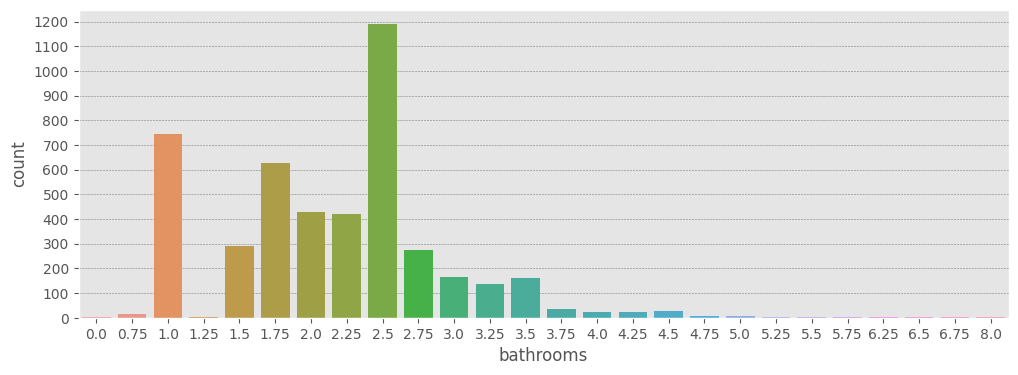

In [14]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

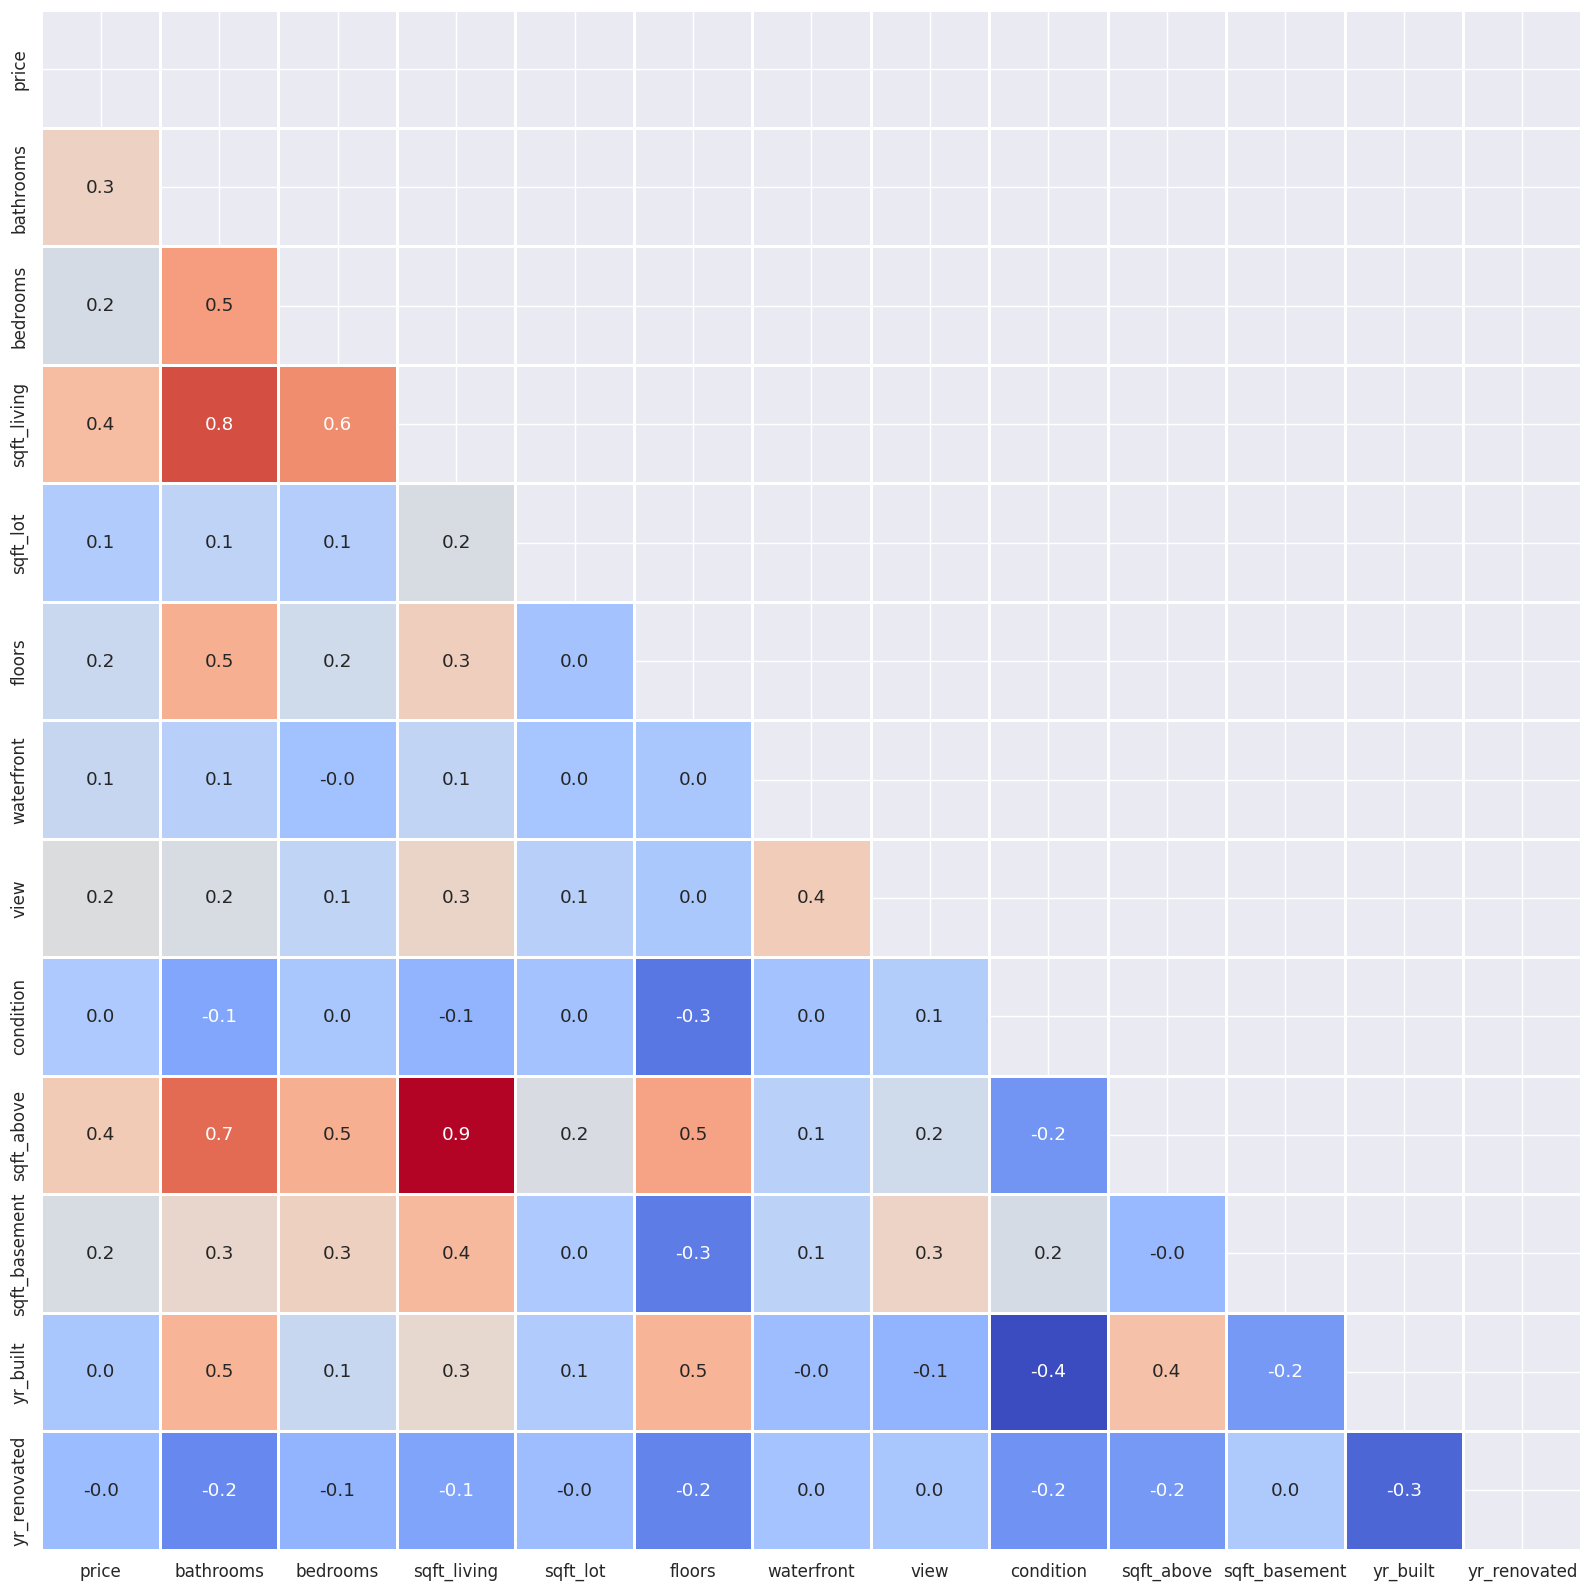

In [15]:
sns.set(font_scale=1.1)
correlation_train = numerical.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

Median value of house with respect to number of bedrooms : 
 bedrooms
0    1195324.0
1     262500.0
2     369500.0
3     424750.0
4     568000.0
5     580000.0
6     665000.0
7     711500.0
8    1155000.0
9     599999.0
Name: price, dtype: float64


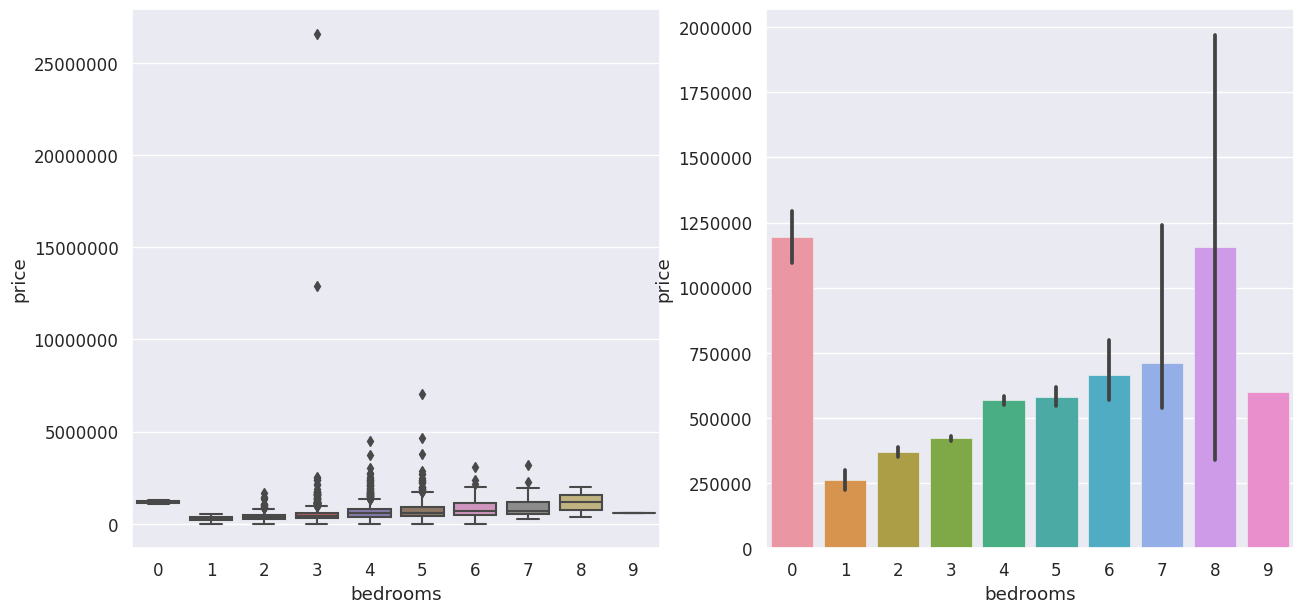

In [16]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of bedrooms : \n",df.groupby("bedrooms")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="bedrooms", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of floors : 
 floors
1.0    390700.0
1.5    535000.0
2.0    554000.0
2.5    831500.0
3.0    479500.0
3.5    829250.0
Name: price, dtype: float64


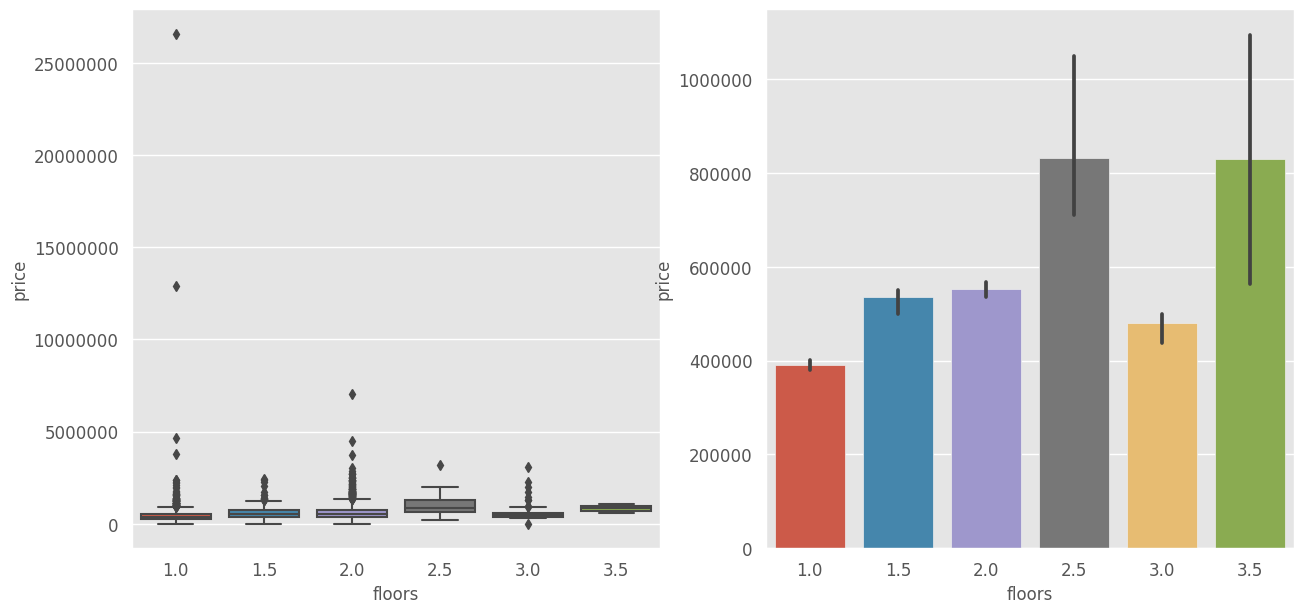

In [17]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="floors")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of floors : \n",df.groupby("floors")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="floors",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of condition : 
 condition
1    310000.0
2    250000.0
3    465000.0
4    440000.0
5    550000.0
Name: price, dtype: float64


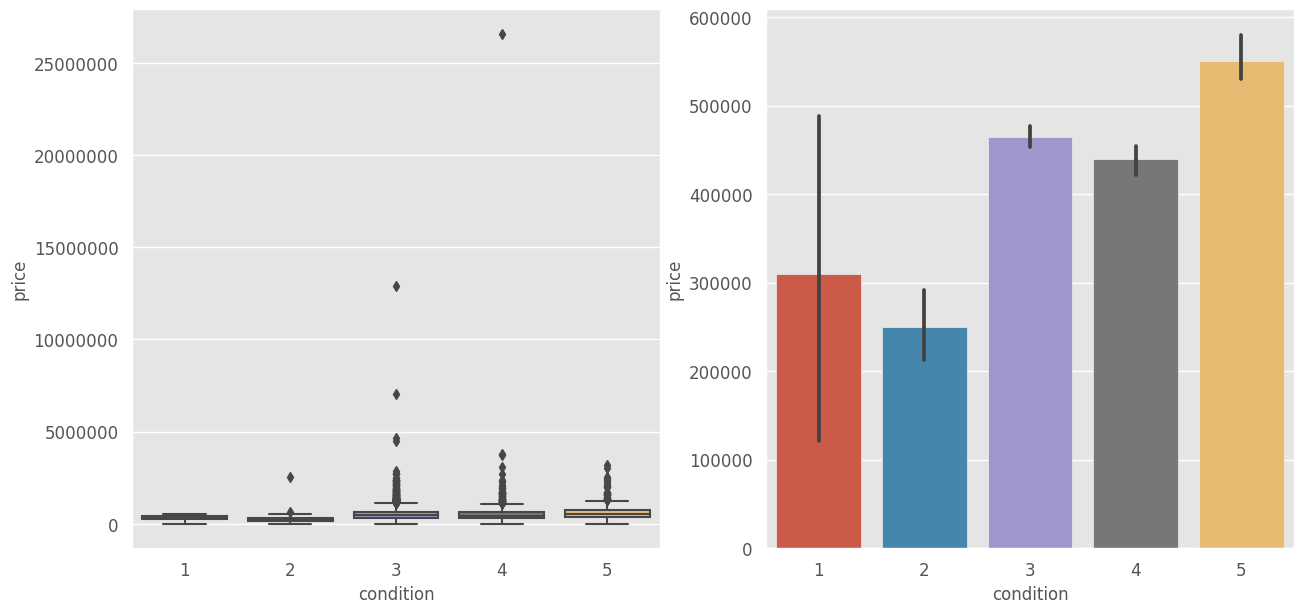

In [18]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="condition")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of condition : \n",df.groupby("condition")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="condition", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of waterfront : 
 waterfront
0    460000.0
1    988500.0
Name: price, dtype: float64


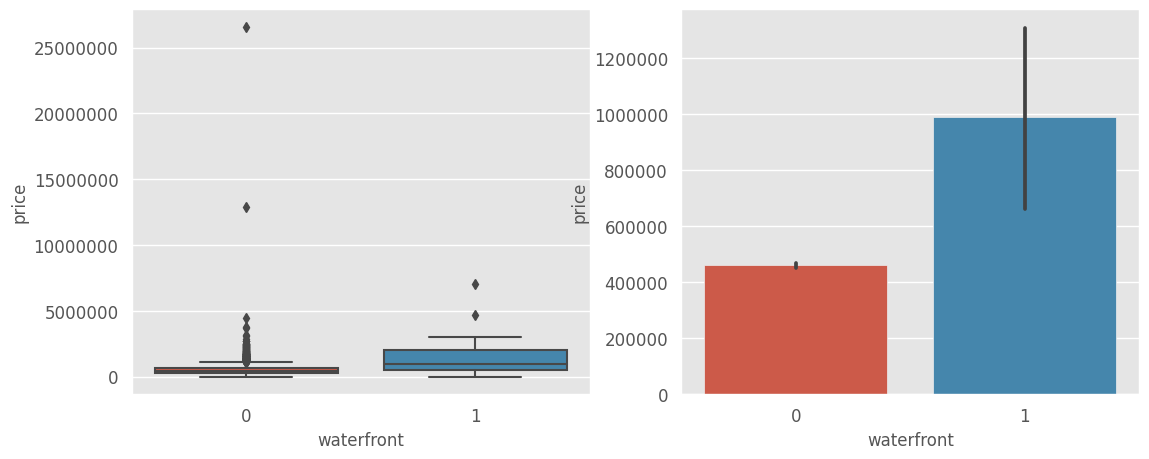

In [19]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="waterfront")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of waterfront : \n",df.groupby("waterfront")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="waterfront",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

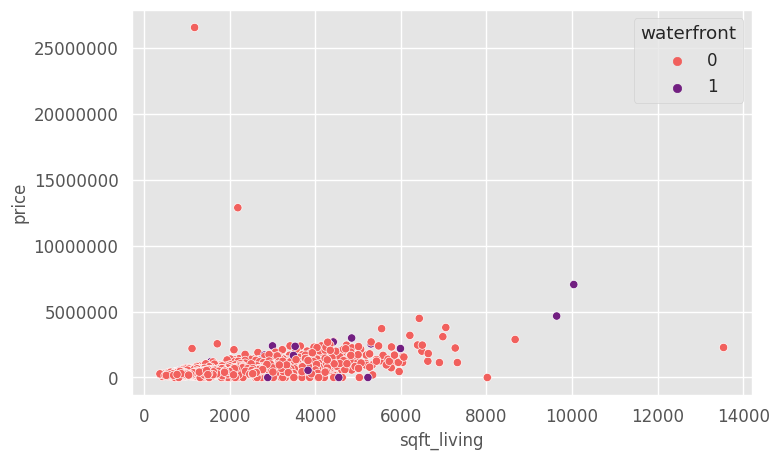

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="waterfront",palette= 'magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

<ipython-input-21-0678088317d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu")


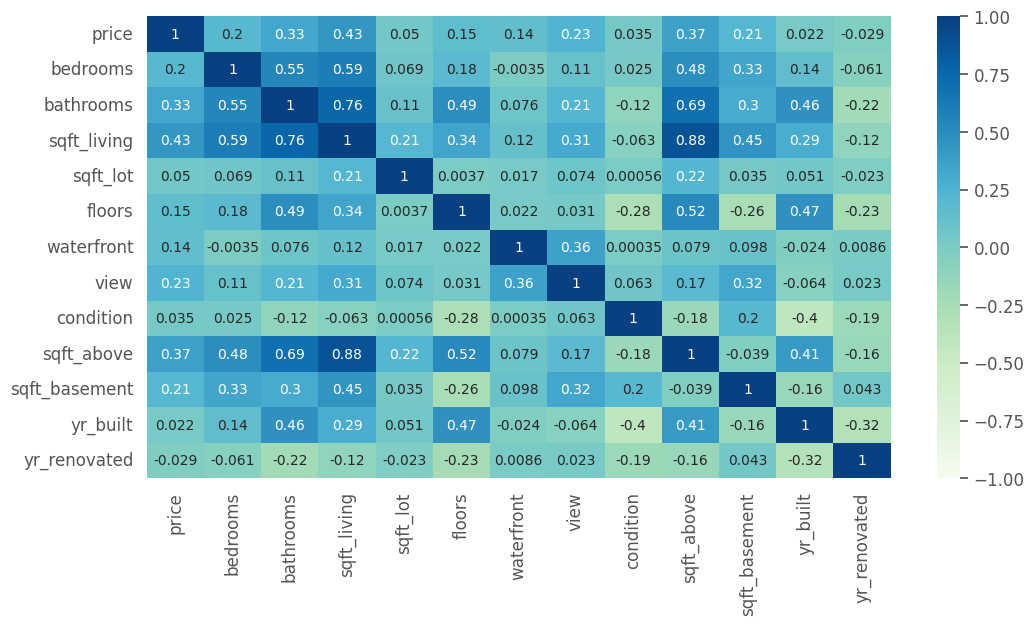

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap="GnBu")
plt.show()

<ipython-input-22-422a89ba67c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


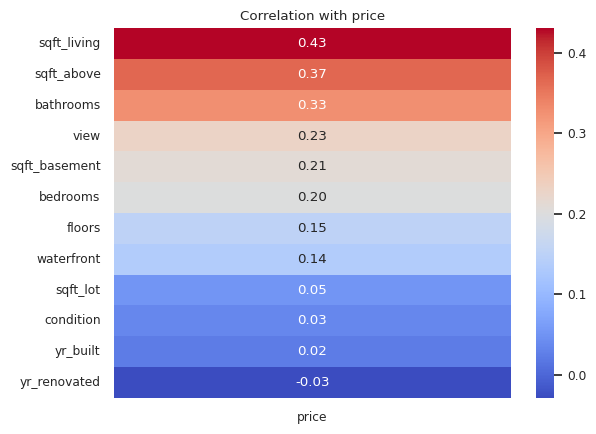

In [22]:
corr = df.corr()
target_corr = corr['price'].drop('price')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with price')
plt.show()

In [23]:
# import module
from sklearn.preprocessing import StandardScaler
# compute required values
scaler = StandardScaler()
model = scaler.fit(numerical)
scaled_data = model.transform(numerical)

# print scaled data
print(scaled_data)

[[-0.42386353 -0.84320364 -0.44112227 ... -0.67246372 -0.53101376
   1.22167046]
 [ 3.2495981   0.43280154  1.75970468 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.37242442 -0.20520105 -0.44112227 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.23956224  0.43280154 -0.44112227 ... -0.67246372  1.2854179
  -0.82569345]
 [-0.61826787 -0.20520105  0.6592912  ...  1.5254011   0.10810108
  -0.82569345]
 [-0.58775916  0.43280154 -0.44112227 ... -0.67246372  0.64630305
  -0.82569345]]


In [24]:
numerical1=df[['price','bathrooms','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data1 = scaler.fit_transform(numerical1)

In [26]:
print(scaled_data1)

[[-0.42386353 -0.84320364 -0.44112227 ... -0.67246372 -0.53101376
   1.22167046]
 [ 3.2495981   0.43280154  1.75970468 ... -0.06912828 -1.67469295
  -0.82569345]
 [-0.37242442 -0.20520105 -0.44112227 ... -0.67246372 -0.1609999
  -0.82569345]
 ...
 [-0.23956224  0.43280154 -0.44112227 ... -0.67246372  1.2854179
  -0.82569345]
 [-0.61826787 -0.20520105  0.6592912  ...  1.5254011   0.10810108
  -0.82569345]
 [-0.58775916  0.43280154 -0.44112227 ... -0.67246372  0.64630305
  -0.82569345]]


In [27]:
bin_boundaries = [1900, 1920, 1950, 1980, 2000, 2020, 2030]  # Define your own bin boundaries

# Create a new column with the binned values
df['yr_built_bins'] = pd.cut(df['yr_built'], bins=bin_boundaries)


In [28]:
bin_boundary = [0, 1000, 1500, 2000, 2500, 3000, 3500, 4000, df['sqft_above'].max()]  # Define your own bin boundaries

# Create a new column with the binned values
df['sqft_above_bins'] = pd.cut(df['sqft_above'], bins=bin_boundary)


In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_built_bins,sqft_above_bins
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,"(1950, 1980]","(1000, 1500]"
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,"(1920, 1950]","(3000, 3500]"
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,"(1950, 1980]","(1500, 2000]"
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,"(1950, 1980]","(0, 1000]"
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,"(1950, 1980]","(1000, 1500]"
